# Lab 02
## Conrad Appel & Eric Hawkins

For this project, we used a data set called "[Comcast Customer Complaints](https://www.kaggle.com/archaeocharlie/comcastcomplaints)", which was uploaded to Kaggle by user Charlie H. The data set consists of CSVs, one containing information about customer complaints to Comcast and another containing information about customer complaints to the FCC about Comcast. Charlie H. scraped the data from consumeraffairs.com and cityexplainer after an overly lengthy support call in order to see if other customers had a similar experience.

Comcast is notorious for having bad customer service. By examining the complaints in this data set, we hoped to find what sorts of negative experiences have fueled this negative perception of the company's customer support.

In [1]:
import pandas as p
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as s
import matplotlib.pyplot as plt
from wordcloud import WordCloud # conda install -c https://conda.anaconda.org/amueller wordcloud
%matplotlib inline

In [2]:
# Load data from csv and print the total number of documents.
data = p.read_csv('comcast-fcc-complaints-2015.csv')
print("Number of documents: " + str(len(data)))

Number of documents: 2225


In [3]:
# Create list of stop words from built-in stop words list along with words particular to the dataset.
# Many of the additional words are from an automated response message from the FCC.
stop_word_list = set("Follow up message by FCC on 2015 AM PM This constitutes a notice of informal complaint filed with the FCC against your company Your response to the consumer with a copy to the FCC is due no later than 30 days from the date of this notice For more information on your legal responsibilities see https us app box com complaintnotice If you have any questions regarding this notice please contact the at carriersupport gov".lower().split() + stopwords.words('english') + ['br', 'comcast', 'carrier'])
stop_word_list.update(('would', 'get', 'gurmilap', 'chris'))
stop_word_list = list(stop_word_list)

# Vectorize data
bow_vectorizer = CountVectorizer(stop_words=list(stop_word_list))
bow = bow_vectorizer.fit_transform(data['Description'])

# Print number of unique words
bow_df = p.DataFrame(data=bow.toarray(), columns=bow_vectorizer.get_feature_names())
print("Vocabulary size: "+str(len(bow_vectorizer.vocabulary_)))

Vocabulary size: 12399


In [4]:
# Perform tf-idf vectorization
tfidf_transformer = TfidfVectorizer(stop_words=list(stop_word_list))
tfidf = tfidf_transformer.fit_transform(data['Description'])

tfidf_df = p.DataFrame(data=tfidf.toarray(), columns=tfidf_transformer.get_feature_names())

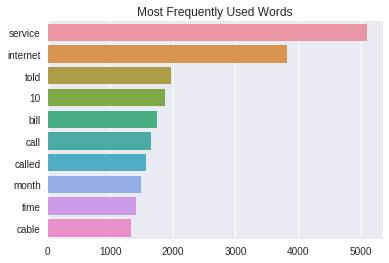

In [6]:
# Plot top 10 words used
top_used_words = bow_df.sum().sort_values(ascending=False)[:10]

top_ax = s.barplot(top_used_words.values, top_used_words.index, orient="h").set_title('Most Frequently Used Words')

The most common word accross the set is 'service'. From looking at the dataset, this appears to be from instances where customers are complaining about their experience with Comcast's "customer service" or "service".

The second most common term is 'internet', which seems to show that a large number of customers are having problems with their Comcast-provided internet service. Of the services provided by Comcast, this appears to be the one that most people have a problem with, seeing as how words that might refer to the other services provided by Comcast, such as 'phone', 'cable', or 'voice', occur significantly less frequently. In the case of Comcast's voice service, this seems to reflect the trend of consumers shifting from home phones to using exclusively cell phones. In the case of Comcast's cable service, one might conclude that they relatively exceptional cable service or that not nearly as many customers use it.

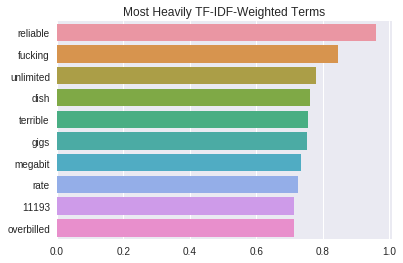

In [7]:
# Plot terms with the highest tf-idf weights
heaviest_words = tfidf_df.max().sort_values(ascending=False)[:10]

hv_ax = s.barplot(heaviest_words.values, heaviest_words.index, orient="h").set_title('Most Heavily TF-IDF-Weighted Terms')

Tf-idf weighting refers to a statistic representing the significance of a particular term in a document within a collection of documents. Terms with the highest tf-idf rankings occur many times within a small number of documents. These scores are somewhat lower if the term occurs fewer times in a document or occurs across a large number of documents. This score is at its lowest when the term occurs in nearly if not all documents. THESE VALUES SHOULD NOT BE USED TO DETERMINE WHAT PROBLEMS ARE THE MOST WIDESPREAD.

The word with the greatest tf-idf value is 'reliable'. Ironically, in the dataset, this word seems to be used most frequently to describe either what the complaining customer's internet service is *not* or what it used to be but isn't anymore.

The second highest scoring term is 'fucking'. However, this doesn't mean that it occurs frequently across the dataset. Much of the reason why the term has such a high weighting is that it occurs *a lot* in a small number of documents.

Strangely, ninth highest scoring term is '11193', which seems to be the number of a customer support ticket that was never resolved. This term occurs only once across the entire dataset. However, the text of its entry is very short: "Ticket 11193 closed but no resolution was obtained". This ticket was closed on April 4, 2015". The brevity is likely what caused the term to score so high, and, since the only time it occurs in the data set was the day the ticket it refers to was closed, we can guess that this ticket was probably opened and discussed before the dataset started being collected, especially since the first entry occurs three days prior on April 1, 2015.

For the most part, the remaining terms in the top ten are from complaints about Comcast's unlimited data plans, mentions of their competitor Dish, complaints about internet speed, and complaints about overbilling.

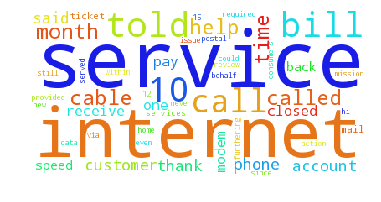

In [8]:
# Create word cloud of the most frequently used terms
wc = WordCloud(max_words=50, background_color="white").generate_from_frequencies(bow_df.sum().sort_values(ascending=False).iteritems())
plt.axis("off")
wc_ax = plt.imshow(wc)